Em um sistema 64-bits um inteiro ocupa 64-bits ou **8 bytes**🤞


---


Strides: o número de de bytes na memória para pular na memória para se 
chegar no próximo elemento


In [3]:
import numpy as np

x = np.arange(9).reshape((3,3))
print(x)
xT = x.T
print(xT)

print("Strides: "+str(x.strides))


[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 3 6]
 [1 4 7]
 [2 5 8]]
Strides: (12, 4)


3*8=24, 24bytes para próxima linha ou 3 inteiros

**Vectorization** - transforma o array todo em um elemento só
podemos somar elementos 

---

Caso não dê para  fazer a operação, usa-se o broadcasting:
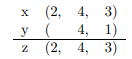


In [22]:
a = np.array([1,3,5])
b = 3 * a
print(f'Matriz b:{b}\n')
m = np.arange(6).reshape((2,3))
print(f'Matriz m:\n{m}\n')
print(f'Matriz m+b:\n{m+b}')

Matriz b:[ 3  9 15]

Matriz m:
[[0 1 2]
 [3 4 5]]

Matriz m+b:
[[ 3 10 17]
 [ 6 13 20]]


Podemos aplicar funções nos nossos arrays

In [18]:
def f(x):
  return x**2 - 3*x +4

x = np.arange(1e5)

y = f(x)

print(f'Array computado:\n {y}')

Array computado:
 [4.00000000e+00 2.00000000e+00 2.00000000e+00 ... 9.99910002e+09
 9.99930001e+09 9.99950001e+09]


É possível fazermos Diferença finita em nossos cálculos muito mais rápido

In [20]:
x = np.arange(0,10,2)
y = x**2

dy_dx =  (y[1:]-y[:-1])/(x[1:]-x[:-1])
print(f'{dy_dx}')

[ 2.  6. 10. 14.]


Podemos contruir estruturas tri-dimensionais utilizando apenas estruturas com uma dimensão

In [25]:
# Construct the row vector: from -100 to +100
i = np.arange(-100, 100).reshape(200, 1, 1)
# Construct the column vector
j = np.reshape(i, (1, 200, 1))
# Construct the depth vector
k = np.reshape(i, (1, 1, 200))

#Atalho
i, j, k = np.ogrid[-100:100, -100:100, -100:100]

#para montar a estrutura
R = np.sqrt(i**2 +j**2+k**2)
print(f'{R.shape}')

(200, 200, 200)


É possivel multiplicarmos matrizes de forma efeciente e lidarmos com a memoria que vem de códigos externos , ou seja, lidarmos com arrays gerados por progamas em C por exemplo

In [ ]:
points = np.random.random((100000, 3))
camera = np.array([[500., 0., 320.],
[ 0., 500., 240.],
[ 0., 0., 1.]])

# Perform the matrix product on the coordinates
vecs = camera.dot(points.T).T
# Divide resulting coordinates by their z-value
pixel_coords = vecs/vecs[:, 2, np.newaxis]

In [50]: a = np.memmap(’/tmp/myarray.memmap’,
...: mode=’write’, shape=(300, 300),
...: dtype=np.int)
# Pretend "a" is a one-dimensional, 300*300
# array and assign values into it
In [51]: a.flat = np.arange(300* 300)
In [52]: a
Out[52]:
memmap([[ 0, 1, ..., 298, 299],
[ 300, 301, ..., 598, 599],
[ 600, 601, ..., 898, 899],
...,
[89100, 89101, ..., 89398, 89399],
[89400, 89401, ..., 89698, 89699],
[89700, 89701, ..., 89998, 89999]])
#When the “flush” method is called, its data is
#written to disk:
#In [53]: a.flush()
#The array can now be loaded and parts of it manipulated; calling “flush” writes the altered data
#back to disk:
# Load the memory mapped array
# In [54]: b = np.memmap(’/tmp/myarray.memmap’,
# ...: mode=’r+’, shape=(300, 300),
# ...: dtype=np.int)
# Perform some operation on the elements of b
#In [55]: b[100, :] *= 2
# Store the modifications to disk
#In [56]: b.flush()

In [ ]:
import ctypes
class MutableString(object):
def __init__(self, s):
# Allocate string memory
self._s = ctypes.create_string_buffer(s)
self.__array_interface__ = {
# Shape of the array
’shape’: (len(s),),
# Address of data,
# the memory is not read-only
’data’: (ctypes.addressof(self._s), False),
# Stores 1-byte unsigned integers.
# "|" indicates that Endianess is
# irrelevant for this data-type.
’typestr’: ’|u1’,
}
def __str__(self):
"Convert to a string for printing."
return str(buffer(self._s))
The above class is instantiated, after which
NumPy is asked to interpret it as an array, which
is possible because of its __array_interface__
attribute.
# Create an instance of our mutable string class
# In [57]: m = MutableString(’abcde’)
# View the character byte values as an array
In [58]: am = np.asarray(m)
In [59]: am
Out[59]: array([ 97, 98, 99, 100, 101],
dtype=uint8)
# Modify the values of the array
# In [60]: am += 2
# In [61]: am
# Out[61]: array([ 99, 100, 101, 102, 103],
# dtype=uint8)

In [ ]:
# monstrando arrays com mais de um tipo (arrays compostos)
In [63]: dt = np.dtype([(’time’, np.uint64),
...: (’pos’, [(’x’, float),
...: (’y’, float)])])
An array of measurements can then be constructed using this data-type as
In [64]: x = np.array([(1, (0, 0.5)),
...: (2, (0, 10.3)),
...: (3, (5.5, 1.1))],
...: dtype=dt)
The individual fields of such a structured array
can be queried:
# Display all time-stamps
In [65]: x[’time’]
Out[65]: array([1, 2, 3], dtype=uint64)
# Display x-coordinates for all timestamps >= 2
In [66]: times = (x[’time’] >= 2)
In [67]: print times
[False True True]
In [68]: x[times][’pos’][’x’]
Out[68]: array([ 0. , 5.5])